In [1]:
%matplotlib inline

In [2]:
import pickle
import pandas as pd
import numpy as np

In [3]:
data_dir = './data/'

In [4]:
import flatten as fat

In [5]:
DATA_DIR = './data/'

In [8]:
climb = fat.combine_pickle(DATA_DIR)

In [9]:
climb.shape

(11852, 43)

In [10]:
# isolate grade columns
import re
rate = [col for col in climb.columns if re.search(r'^rate', col)]
grade = climb[rate]
grade.shape

(11852, 8)

In [11]:
grade = grade.dropna(axis=0, how='all')
grade.sort_values(['rateZA'])

,rateBritish,rateEwbanks,rateFont,rateFrench,rateHueco,rateUIAA,rateYDS,rateZA
/v/yard-peak-north-flank-pine-beetle-couloir/107646890,M 1a,1,NaN,1-,NaN,I,3rd,1
/v/mount-beulah-ne-couloir-and-north-ridge/106756634,M 1a,1,NaN,1-,NaN,I,3rd,1
/v/regular-north-face-route/106485727,M 1a,1,NaN,1-,NaN,I,3rd,1
/v/hi-im-the-best-guide-evar/107669177,VD 3c,12,NaN,4a,NaN,IV,5.4,10
/v/north-face-aka-wyrick-merrill/105718831,VD 3c,12,NaN,4a,NaN,IV,5.4,10
/v/rhine-legions/107546169,VD 3c,12,NaN,4a,NaN,IV,5.4,10
/v/unknown/106978408,VD 3c,12,NaN,4a,NaN,IV,5.4,10
/v/use-to-be-bushy/106149918,VD 3c,12,NaN,4a,NaN,IV,5.4,10
/v/diving-board-chimney/107687141,VD 3c,12,NaN,4a,NaN,IV,5.4,10
/v/baby-face/105741542,VD 3c,12,NaN,4a,NaN,IV,5.4,10


In [13]:
#grade.sort_values(['rateEwbanks'])
grade['rateHueco'].unique()

array(['V0+', nan, 'V0-', 'V3-', 'V1', 'V0', 'V-easy', 'V3', 'V2', 'V1-',
       'V6-', 'V1+', 'V5', 'V8-9', 'V4-', 'V3+', 'V8', 'V4', 'V7', 'V10',
       'V2-3', 'V2+', 'V3-4', 'V6+', 'V0-1', 'V4+', 'V6-7', 'V7-8', 'V4-5',
       'V5-6', 'V6', 'V7+', 'V9', 'V9-10', 'V11', 'V7-', 'V1-2', 'V12',
       'V5+', 'V9-', 'V13', 'V2-', 'V10+', 'V8-', 'V10-11', 'V5-', 'V11-',
       'V9+', 'V11-12', 'V12-13', 'V10-', 'V8+'], dtype=object)

In [11]:
grade.rateHueco.unique()

array(['V0', 'V1+', 'V6', 'V5', 'V7', 'V3', 'V0-', 'V0+', 'V2', 'V9+',
       'V4-', 'V-easy'], dtype=object)

In [21]:
import numpy as np
def convert_hueco(hueco, LEAST_DIFFICULT=float(0), FIRST_STEP=float(1)):

    if not pd.isnull(hueco):
        hueco = hueco[1:]

        if hueco == '-easy':
            # lower bound
            hard = LEAST_DIFFICULT
        else:
            # V0 will be equal to this
            hard = LEAST_DIFFICULT + FIRST_STEP

            # deal with the numbers in the string
            if re.search(r'(\+$)|(-$)', hueco):
                pnt = float(hueco[:-1].strip())
                # add/take a half a point off for plus minus
                if hueco[-1] == '+':
                    hard += pnt + .5
                else:
                    hard += pnt - .5
            elif re.search(r'(\d+)[- ]+(\d+)', hueco):
                # return the mean of a range
                lower = re.findall(r'\d+', hueco)[0].strip()
                upper = re.findall(r'\d+', hueco)[1].strip()
                hard += np.mean( [float(lower), float(upper)] )
            elif re.search(r'\d+', hueco):                    
                try:
                    # cast as float ignoring sign
                    core_rate = float(hueco.strip('+-'))
                except:
                    hard = None
                else:
                    hard += core_rate

        return hard

In [23]:
convert_hueco('45-46')

26.5

In [24]:
climb['floatHueco'] = map(convert_hueco, climb['rateHueco'])

In [25]:
np.median(climb['floatHueco'].dropna())

4.0

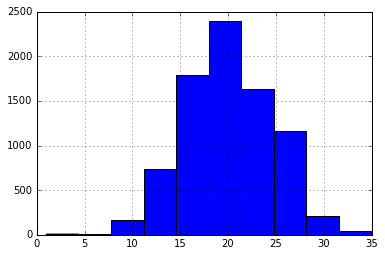

In [26]:
climb['floatZA'] = climb['rateZA'].astype(float)
climb['floatZA'].hist()

In [28]:
from statsmodels.distributions.empirical_distribution import ECDF
def scale01(feature):
    # use on an entire column
    ecdf = ECDF(feature.dropna())
    qtile = ecdf(feature)
    qtile[qtile == 1.0] = float('NaN')
    return qtile

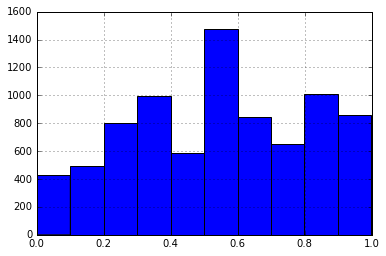

In [29]:
ZAqtile = scale01(climb['floatZA'])
pd.Series(ZAqtile).hist()

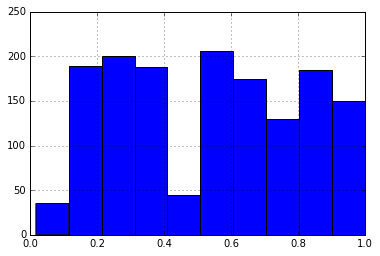

In [30]:
HUECOqtile = scale01(climb['floatHueco'])
pd.Series(HUECOqtile).hist()

In [61]:
climb['pctHueco'] = scale01(climb['floatHueco'])
climb['pctZA'] = scale01(climb['floatZA'])

In [62]:
climb['gradeComb'] = climb[['pctHueco','pctZA']].mean(axis='columns')

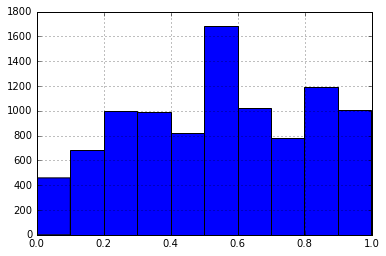

In [63]:
climb['gradeComb'].hist()

In [ ]:
# NEED A BETA DISTRIBUTION FOR PRIOR